In [1]:
import numpy as np
import bokeh.io
import bebi103.viz
import bebi103.stan
import pandas as pd
import altair as alt
bokeh.io.output_notebook()

Loading BokehJS ...

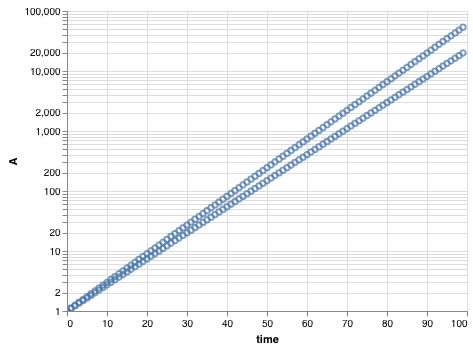

In [24]:
np.random.seed(666)
N = 100
idx = np.ones(2 * N)
idx[N:] = 2
idx = idx.astype(int)
time = np.arange(0, N);
A_0 = [2, 2.5]
r = [0.1, 0.11]
A = np.zeros(2 * N)
A[:N] = A_0[0] * np.exp(r[0] * time)
A[:N] /= A_0[0]
A[N:] = A_0[1] * np.exp(r[1] * time)
A[N:] /= A_0[1]
_time = np.zeros(2 * N)
_time[:N] = time
_time[N:] = time
data_dict = {'J':2, 'idx':idx, 'N':N*2, 'time': _time, 'A': A}
alt.Chart(pd.DataFrame.from_dict(data_dict)).mark_point().encode(x='time:Q', y=alt.Y('A:Q', scale={'type':'log'})).interactive()

In [42]:
model = bebi103.stan.StanModel('growth_rate.stan')
samples = model.sampling(data_dict)
p = bebi103.viz.corner(samples, vars=['r', 'r_1[1]', 'r_1[2]', 'sigma_1[1]', 'sigma_1[2]'], datashade=True)
bokeh.io.show(p)

Using cached StanModel.


In [161]:
samples

Inference for Stan model: anon_model_24b15fdfd5801cc57b593c49f687a86e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
log_r           -0.57    0.17   0.25  -0.93  -0.78  -0.55  -0.36  -0.25      2 866.15
log_r_2[1]       -2.3  2.4e-9 1.5e-7   -2.3   -2.3   -2.3   -2.3   -2.3   3730    1.0
log_r_2[2]      -2.21  1.6e-8 1.2e-6  -2.21  -2.21  -2.21  -2.21  -2.21   5651    1.0
log_sigma       -0.29    0.54   0.76  -1.19  -0.94  -0.44   0.39   0.89      2 1993.9
log_sigma_2[1] -12.49    0.23   0.32  -13.0 -12.74 -12.47 -12.19 -12.05      2   13.6
log_sigma_2[2] -10.53    0.43   0.63 -11.25 -11.17 -10.61 -10.09  -9.37      2  10.67
log_A0[1]        0.69  1.4e-8 8.3e-7   0.69   0.69   0.69   0.69   0.69   3360    1.0
log_A0[2]        0.92  1.0e-7 7.7e-6   0.92   0.92   0.92   0.92   0.92   5819    1.0
r                0.58     0.1   0.14 